# 指定した境界値でビン分割を行う

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# 年齢データの生成
## 平均40, 標準偏差10, 1000サンプル
age = np.random.normal(40, 10, 1000)

# 最大99.9, 最小0に丸める
age[age < 0] = 0.0
age[age > 99.9] = 99.9

(array([   3.,    8.,   67.,  140.,  269.,  272.,  165.,   58.,   16.,    2.]),
 array([  4.90857661,  11.92109344,  18.93361028,  25.94612711,
         32.95864395,  39.97116078,  46.98367762,  53.99619445,
         61.00871129,  68.02122812,  75.03374495]),
 <a list of 10 Patch objects>)

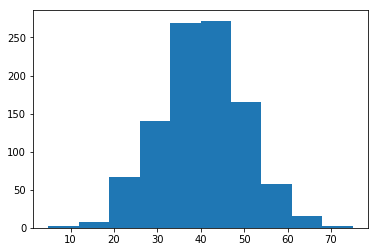

In [3]:
# 年齢データのヒストグラム
plt.hist(age)

In [4]:
# 「20才未満」「20〜60才は10才刻み」「60才以上」でビン分割
age_ctgr_list = [0, 20, 30, 40, 50, 60, 100]
age_ctgr = pd.cut(age, bins=age_ctgr_list)

In [5]:
# 変換できているか確認する
pd.DataFrame({'age': age, 'age_ctgr': age_ctgr})[1:7]

,age,age_ctgr
1,29.280496,"(20, 30]"
2,39.401364,"(30, 40]"
3,37.449142,"(30, 40]"
4,30.488811,"(30, 40]"
5,47.048201,"(40, 50]"
6,27.662616,"(20, 30]"


In [6]:
# ラベル名を指定してビン分割
age_ctgr_name = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-']
age_ctgr = pd.cut(age, bins=age_ctgr_list, labels=age_ctgr_name)

<Container object of 6 artists>

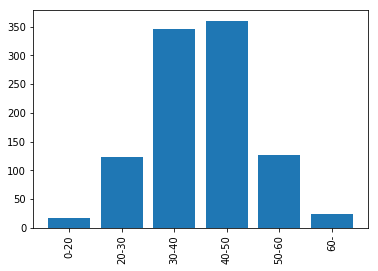

In [7]:
# カテゴリごとに集計しplot
plot_data = age_ctgr.value_counts().sort_index()
x_labels = [str(ctgr) for ctgr in plot_data.index]

plt.xticks(rotation=90)
plt.bar(x_labels, plot_data)